#Dependencies

In [262]:
import re
import nltk
import numpy as np
import pandas as pd
from nltk import word_tokenize 
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_selection import chi2
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('wordnet')
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#Pre Processing

read from files and remove columns other than text and sentiment

In [263]:
directory = ""

train_data = pd.read_csv(directory + "airline-train.csv")
# Keeping only the neccessary columns
train_data = train_data[["text", "airline_sentiment"]]

validation_data = pd.read_csv(directory + "airline-dev.csv")
# Keeping only the neccessary columns
validation_data = validation_data[["text", "airline_sentiment"]]

test_data = pd.read_csv(directory + "airline-test.csv")
# Keeping only the neccessary columns
test_data = test_data[["text", "airline_sentiment"]]

In [264]:
print(train_data)

                                                   text airline_sentiment
0     @USAirways she also appreciated having her ver...          positive
1     @USAirways Just discovered that they billed us...          negative
2                                @USAirways u guys suck          negative
3             @united I will but right now I'm to angry          negative
4     @united not sure why the people in row 7 that ...          negative
...                                                 ...               ...
8779  @SouthwestAir flight 4040 atl to lga Cancelled...          negative
8780  @JetBlue keeps getting better. No water on the...          negative
8781  @USAirways @AmericanAir working for me. Tight ...          negative
8782  @SouthwestAir are you guys alive? i've been on...          negative
8783  @USAirways NEVER AGAIN! Worse experience in my...          negative

[8784 rows x 2 columns]


remove IDs from tweets text

In [265]:
train_data.text = train_data.text.replace(to_replace =r'@([A-Za-z0-9_]+)', value = '', regex = True)
validation_data.text = validation_data.text.replace(to_replace =r'@([A-Za-z0-9_]+)', value = '', regex = True) 
test_data.text = test_data.text.replace(to_replace =r'@([A-Za-z0-9_]+)', value = '', regex = True) 

In [266]:
print(train_data)

                                                   text airline_sentiment
0      she also appreciated having her very own hash...          positive
1      Just discovered that they billed us $300 for ...          negative
2                                           u guys suck          negative
3                     I will but right now I'm to angry          negative
4      not sure why the people in row 7 that paid fo...          negative
...                                                 ...               ...
8779   flight 4040 atl to lga Cancelled Flightled an...          negative
8780       keeps getting better. No water on the plane.          negative
8781    working for me. Tight cx  so they're delayin...          negative
8782   are you guys alive? i've been on hold for 25 ...          negative
8783   NEVER AGAIN! Worse experience in my life. htt...          negative

[8784 rows x 2 columns]


remove numbers

In [267]:
train_data.text = train_data.text.replace(to_replace =r"\d+", value = ' ', regex = True) 
validation_data.text = validation_data.text.replace(to_replace =r"\d+", value = ' ', regex = True) 
test_data.text = test_data.text.replace(to_replace =r"\d+", value = ' ', regex = True) 

In [268]:
print(train_data)

                                                   text airline_sentiment
0      she also appreciated having her very own hash...          positive
1      Just discovered that they billed us $  for th...          negative
2                                           u guys suck          negative
3                     I will but right now I'm to angry          negative
4      not sure why the people in row   that paid fo...          negative
...                                                 ...               ...
8779   flight   atl to lga Cancelled Flightled any s...          negative
8780       keeps getting better. No water on the plane.          negative
8781    working for me. Tight cx  so they're delayin...          negative
8782   are you guys alive? i've been on hold for   m...          negative
8783   NEVER AGAIN! Worse experience in my life. htt...          negative

[8784 rows x 2 columns]


remove punctuations

In [269]:
train_data.text = train_data.text.replace(to_replace =r"[^\w\s]", value = ' ', regex = True) 
validation_data.text = validation_data.text.replace(to_replace =r"[^\w\s]", value = ' ', regex = True) 
test_data.text = test_data.text.replace(to_replace =r"[^\w\s]", value = ' ', regex = True) 

In [270]:
print(train_data)

                                                   text airline_sentiment
0      she also appreciated having her very own hash...          positive
1      Just discovered that they billed us    for th...          negative
2                                           u guys suck          negative
3                     I will but right now I m to angry          negative
4      not sure why the people in row   that paid fo...          negative
...                                                 ...               ...
8779   flight   atl to lga Cancelled Flightled any s...          negative
8780       keeps getting better  No water on the plane           negative
8781    working for me  Tight cx  so they re delayin...          negative
8782   are you guys alive  i ve been on hold for   m...          negative
8783   NEVER AGAIN  Worse experience in my life  htt...          negative

[8784 rows x 2 columns]


remove mords long less than 3 letters

In [271]:
train_data.text = train_data.text.replace(to_replace =r'\b\w{1,2}\b', value = '', regex = True) 
validation_data.text = validation_data.text.replace(to_replace =r'\b\w{1,2}\b', value = '', regex = True) 
test_data.text = test_data.text.replace(to_replace =r'\b\w{1,2}\b', value = '', regex = True) 

In [272]:
print(train_data)

                                                   text airline_sentiment
0      she also appreciated having her very own hash...          positive
1      Just discovered that they billed     for the ...          negative
2                                             guys suck          negative
3                           will but right now    angry          negative
4      not sure why the people  row   that paid for ...          negative
...                                                 ...               ...
8779   flight   atl  lga Cancelled Flightled any sug...          negative
8780           keeps getting better   water  the plane           negative
8781    working for   Tight    they  delaying our fl...          negative
8782   are you guys alive    been  hold for   minute...          negative
8783   NEVER AGAIN  Worse experience   life  http   ...          negative

[8784 rows x 2 columns]


lemmatize and tokenize

In [273]:
class StemLemmaTokenizer:
    def __init__(self):
        self.lemmatizer = WordNetLemmatizer()
        self.stemmer = PorterStemmer()
    def __call__(self, text):
        stemmed_words = [self.stemmer.stem(word.lower()) for word in word_tokenize(text)]
        return [self.lemmatizer.lemmatize(word) for word in stemmed_words]

vectorize text words - tf/idt   and   remove stop words

In [296]:
tokenizer = StemLemmaTokenizer()
stop_words = set(stopwords.words("english"))
stop_words.add('much')
stop_words.add('http')
token_stop = tokenizer(' '.join(stop_words))
vectorizer = TfidfVectorizer(max_features=5000, stop_words=token_stop, ngram_range=(1, 3), tokenizer=tokenizer)

In [297]:
X_train = vectorizer.fit_transform(train_data.text)
y_train = train_data.airline_sentiment
X_validation = vectorizer.transform(validation_data.text)
y_validation = validation_data.airline_sentiment
X_test = vectorizer.transform(test_data.text)
y_test = test_data.airline_sentiment

/usr/local/lib/python3.6/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['becau'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [298]:
print(X_train)

  (0, 246)	0.6925780630419479
  (0, 150)	0.7213429327255266
  (1, 1626)	0.40548844775802817
  (1, 3665)	0.35425212002943407
  (1, 4913)	0.21775685165564482
  (1, 2743)	0.24137264840644634
  (1, 1029)	0.19829512022175322
  (1, 3851)	0.3056815072706776
  (1, 907)	0.295826618437884
  (1, 1586)	0.10756269463099374
  (1, 3662)	0.2895990727740174
  (1, 480)	0.3731619241303199
  (1, 1193)	0.3865786436571424
  (2, 2140)	0.7278827009072247
  (2, 4219)	0.5476712372104584
  (2, 2122)	0.4126051255769484
  (3, 187)	0.8196170774722011
  (3, 3713)	0.5729117264604798
  (4, 3219)	0.3875853694591838
  (4, 3291)	0.3977947271361265
  (4, 4076)	0.3177645991712911
  (4, 3217)	0.32415904638219456
  (4, 4693)	0.23289667811708786
  (4, 3833)	0.20507969246720995
  (4, 3452)	0.34386840766824583
  :	:
  (8780, 461)	0.3419818724325801
  (8780, 2525)	0.4662278291992302
  (8780, 3354)	0.2579665837284699
  (8780, 2523)	0.3379745923353181
  (8780, 1936)	0.20551437887414595
  (8781, 3850)	0.518785092321205
  (8781, 442

#Chi2

In [299]:
chi2score = chi2(X_train, y_train)[0]

plot the most important words identified by chi2

Text(0.5, 0, '$\\chi^2$')

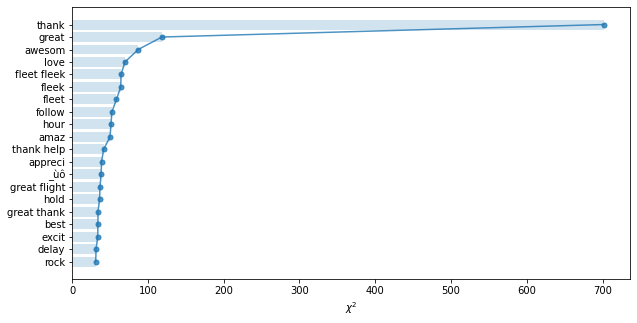

In [300]:
plt.figure(figsize=(10,5))
wscores = zip(vectorizer.get_feature_names(), chi2score)
wchi2 = sorted(wscores, key=lambda x:x[1])
topchi2 = list(zip(*wchi2[-20:]))
x = range(len(topchi2[1]))
labels = topchi2[0]
plt.barh(x,topchi2[1], align='center', alpha=0.2)
plt.plot(topchi2[1], x, '-o', markersize=5, alpha=0.8)
plt.yticks(x, labels)
plt.xlabel('$\chi^2$')

obtain the score for different numbers of top_words to choose best using validation data

In [301]:
from sklearn.feature_selection import SelectKBest, chi2
ch2_result = []
for n in np.arange(100,1000,10):
    ch2 = SelectKBest(chi2, k=n)
    x_train_chi2_selected = ch2.fit_transform(X_train, y_train)
    x_validation_chi2_selected = ch2.transform(X_validation)
    knn = KNeighborsClassifier(n_neighbors = 13).fit(x_train_chi2_selected, y_train)
    score = knn.score(x_validation_chi2_selected, y_validation)
    ch2_result.append(score)

In [302]:
print(max(ch2_result)*100, ch2_result.index(max(ch2_result))*10 + 100)

71.85792349726776 400


=> best number for top important words = 400

#KNN classifier

train KNN classifier

In [303]:
ch2 = SelectKBest(chi2, k=400)
x_train_chi2_selected = ch2.fit_transform(X_train, y_train)
x_test_chi2_selected = ch2.transform(X_test)

In [304]:
knn = KNeighborsClassifier(n_neighbors = 13).fit(x_train_chi2_selected, y_train) 

test KNN classifier using test data

In [305]:
score = knn.score(x_test_chi2_selected, y_test) 
print("KNN test score is: ", score*100)

KNN test score is:  72.6775956284153


In [306]:
knn_predictions = knn.predict(x_test_chi2_selected)

In [307]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

    negative       0.77      0.90      0.83      1826
     neutral       0.54      0.47      0.50       636
    positive       0.79      0.40      0.53       466

    accuracy                           0.73      2928
   macro avg       0.70      0.59      0.62      2928
weighted avg       0.72      0.73      0.71      2928



#Plot confusion matrix

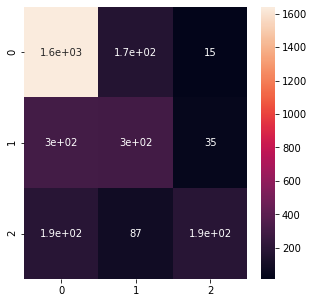

In [308]:
import seaborn as sn

matrix = confusion_matrix(y_test, knn_predictions)
plt.figure(figsize = (5,5))
sn.heatmap(matrix, annot=True)

plt.show()

# Test KNN classifier by the input tweet

In [309]:
def normalize(text):
  text = text.replace(to_replace =r'@([A-Za-z0-9_]+)', value = '', regex = True)
  text = text.replace(to_replace =r"\d+", value = ' ', regex = True) 
  text = text.replace(to_replace =r"[^\w\s]", value = ' ', regex = True) 
  text.replace(to_replace =r'\b\w{1,2}\b', value = '', regex = True)
  return data

In [310]:
while True:
    text = input("enter tweets text (or exit to finish): ")
    if text == "exit":
        break
    text = normalize(data)
    X_test = vectorizer.transform(pd.core.series.Series(text))
    x_test_chi2_selected = ch2.transform(X_test)
    knn_prediction = knn.predict(x_test_chi2_selected)
    print(knn_prediction)

enter tweets text (or exit to finish): exit
